<i>Written by: Ahsan Khan, on behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 1: K-NearestNeighbour (KNN)

For the first lab activity we will be using a dataset which contains the chemical compositions of different wines. More information about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/wine. This dataset is built-in the scikit-learn library and we can load it directly from there. Recall that KNNs are used for classification predictions based on the 'closeness' of our input to other datapoints. KNNs use distance metrics such as euclidean, manhattan, jaccard, etc; with euclidean being the most widely used and the default metric in the scikit-learn library.

Familiarize yourself with these imports as you will be using them a lot in your ML journey.

#### Loading libraries

In [57]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

#### Understanding the dataset

In [58]:
#loading data
wine = load_wine()

In [59]:
# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [60]:
#(2) The target classes(y). The wines are placed into three classes.
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [61]:
#(3) The feature names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

##### This is how the data looks like in a pandas dataframe

In [62]:
df = pd.DataFrame(X, columns=wine['feature_names'])
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.head()

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### Observing the statistics of our data

In [63]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


(Note the max, min and std values for each column)

+## Lab Activity One: Simple K-NN Model

> [AX] indicates an activity to be answered.

##### [A1] Split your data into training and testing. Use ``X_train``, ``y_train``,``X_test`` and ``y_test`` as the assigned variables respectively.

In [64]:
# %% lets split the training data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(df,df['class'], test_size=0.20, random_state=42)

##### [A2] Instantiate model using the default settings

In [65]:
knn = KNeighborsClassifier()

##### [A3] Fit the model

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

##### [A4] Predict on your test data

In [67]:
y_pred = knn.predict(X_test)

##### [A5] Evaluate model performance using the ``accuracy_score()`` function

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7222222222222222


##### [A6] Evaluate model performance using the ``classisification_report()`` function

In [69]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



Granted you successfully fit and predicted a knn classifier on the wine dataset, you will notice the performance of the model is not great. Going back to the statistics of our dataset (the ``df.describe()`` function above)
 - observe the standard deviation of the ``proline`` column. The range of the proline values are siginificantly different that the rest of the dataset (high std).
 - observe the min and max of the ``nonflavanoid_phenols`` column. These values are all between 0 and 1 (percentage) while rest of the data is not.

These non-standarized values affect our model fitting and predictions. Recall that the KNN algorithm uses distance measures to classify similar elements, since some of the feature's values are on a different scale we must **normalize** this dataset.

##### Normalizing your dataset using the ``StandardScaler()`` function and fitting it to your data (normalizing both the ``X_train`` and ``X_test`` values).

In [70]:
#Transform data
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### [A7] Instantiate a new KNN model (``model_2``), fit, predict and evaluate your accuracy again.

In [71]:

model_2 = KNeighborsClassifier(n_neighbors=3)

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of model_2:", accuracy)

Accuracy of model_2: 0.9722222222222222


### Lab Activity Two: Changing the K values

Initially we did not assign any parameters when instantiating the KNN classifer (``model = KNeighborsClassifier()``). The most important parameter to set is the ``K`` value. Recall the ``K`` in the KNN algorithm represents the number of nearest neighbours. So if the value of ``K`` is 3, it means that the 3 nearest neighbours are considered for computation.

In [72]:
k_list = [1,2,3,4,6,8,12,15,20,25]
accuracy_scores_list = []

##### [A8] Using a for loop, iterate through the ``k_list`` above and instantiate (using a different ``K`` everytime), fit, predict and evaluate the models. Store the accuracy results in the ``accuracy_scores_list``.

In [73]:
# Iterate through the k_list
for k in k_list:

    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_list.append(accuracy)

accuracy_scores_list

[0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

##### [A9] Plot a graph of the ``K`` values vs its respective accuracy score.

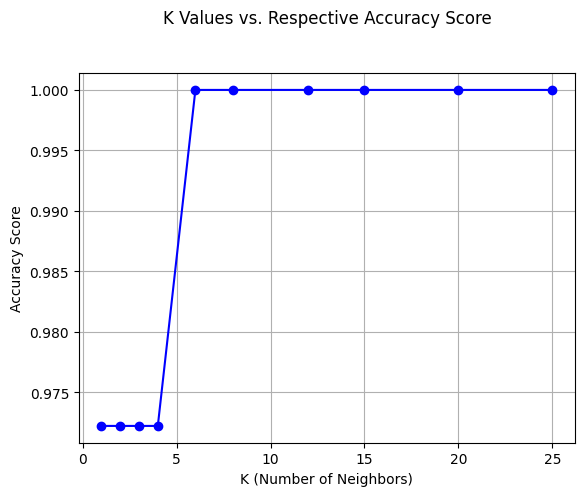

In [74]:
import matplotlib.pyplot as plt

plt.plot(k_list, accuracy_scores_list, marker='o', linestyle='-', color='b')
plt.title('K Values vs. Respective Accuracy Score\n\n')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Display the plot
plt.show()

#### Discussion

##### [A10] Are any of the K-values causing overfitting? What ``K`` value did you find the most optimal?

yes some of the values of K are overfitting which are 6,8,12,15,20,25.The most optimal value of k is 4 approximately equal to 0.987